# A basic TensorFlow Lite model for microcontrollers

This notebook demonstrates the process of training a 2.5 kB model using TensorFlow and converting it for use with TensorFlow Lite for Microcontrollers. 

Deep learning networks learn to model patterns in underlying data. Here, we're going to train a network to model data generated by a sine function. This will result in a model that can take a value, `x`, and predict its sine, `y`.


## Setup Environment

Install TensorFlow

In [1]:
!pip install tensorflow==2.0

    100% |████████████████████████████████| 102.7MB 477kB/s 
    100% |████████████████████████████████| 3.8MB 7.0MB/s 
    100% |████████████████████████████████| 71kB 9.4MB/s 
    100% |████████████████████████████████| 450kB 10.8MB/s 
    100% |████████████████████████████████| 51kB 9.5MB/s 
    100% |████████████████████████████████| 102kB 10.5MB/s 
    100% |████████████████████████████████| 163kB 13.2MB/s 
    100% |████████████████████████████████| 51kB 8.4MB/s 
    100% |████████████████████████████████| 81kB 6.6MB/s 
    100% |████████████████████████████████| 153kB 15.4MB/s 
tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.20.1 which is incompatible.
tensorboard 2.0.2 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.
  Found existing installation: Keras-Applications 1.0.7
    Uninstalling Keras-Applications-1.0.7:
      Successfully uninstalled Keras-Applications-1.0.7
  Found existing installation: tensorfl

Import Dependencies

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math

## Dataset

### 1. Generate Data

The code in the following cell will generate a set of random `x` values, calculate their sine values, and display them on a graph.

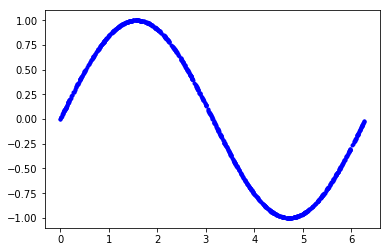

In [3]:
samples = 1000

seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

x_values = np.random.uniform(low=0, high=2*math.pi, size=samples)
np.random.shuffle(x_values)
y_values = np.sin(x_values)

plt.plot(x_values, y_values, 'b.')
plt.show()

### 2. Add Noise
Since it was generated directly by the sine function, our data fits a nice, smooth curve. However, ML models are good at extracting underlying meaning from messy, real world data. To demonstrate this, we can add some noise to our data to approximate something more life-like.

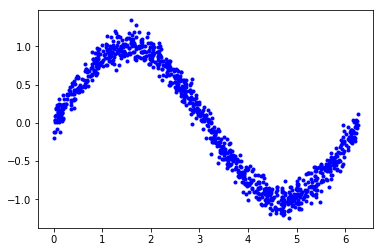

In [4]:
y_values += 0.1 * np.random.randn(samples)

plt.plot(x_values, y_values, 'b.')
plt.show()

### 3. Split the Data
To evaluate the accuracy of the model, we'll need to compare its predictions to real data and check how well they match up. This evaluation happens during training (validation) and after training (testing). The data is split as follows: 60% training, 20% validation and 20% testing

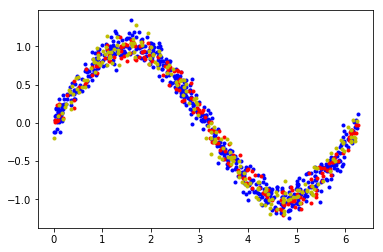

In [5]:
train_split = int(0.6 * samples)
test_split = int(0.2 * samples)
validate_split = int(0.2 * samples)
assert (train_split + test_split + validate_split) ==  samples

x_train, x_test, x_validate = np.split(x_values, [train_split, train_split + test_split])
y_train, y_test, y_validate = np.split(y_values, [train_split, train_split + test_split])
assert (x_train.size + x_validate.size + x_test.size) ==  samples

plt.plot(x_train, y_train, 'b.', label='train')
plt.plot(x_test, y_test, 'r.', label='test')
plt.plot(x_validate, y_validate, 'y.', label='validate')
plt.show()

## Building a Model

### 1. Design the Model
We're going to build a simple NN (using Keras) that will take an input value (x) and use it to predict a numeric output value (sine of x). This type of problem is called a _regression_. We will use _layers_ of _neurons_ to attempt to learn any patterns underlying the training data, so it can make predictions.

We will use just to layers as first attempt.

The first one takes a single input (x value) and runs it through 8 neurons. Based on this input, each neuron will become _activated_ to a certain degree based on its internal state (its _weight_ and _bias_ values). A neuron's degree of activation is expressed as a number.

The activation numbers from our first layer will be fed as inputs to our second layer, which is a single neuron. It will apply its own weights and bias to these inputs and calculate its own activation, which will be output as our y value.

In [6]:
first_model = tf.keras.Sequential()
first_model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))
first_model.add(keras.layers.Dense(1))
first_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
first_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


### 2. Train the Model
Once we've defined the model, we can use our data to _train_ it. Training involves passing an x value into the neural network, checking how far the network's output deviates from the expected y value, and adjusting the neurons' weights and biases so that the output is more likely to be correct the next time.

Training runs this process on the full dataset multiple times, and each full run-through is known as an _epoch_. The number of epochs to run during training is a parameter we can set.

During each epoch, data is run through the network in multiple _batches_. Each batch, several pieces of data are passed into the network, producing output values. These outputs' correctness is measured in aggregate and the network's weights and biases are adjusted accordingly, once per batch. The _batch size_ is also a parameter we can set.

During training, the model's performance is constantly being measured against both our training data and the validation data. Training produces a log of data that tells us how the model's performance changed over the course of the training process.

In [7]:
training = first_model.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/500
600/600 [==============================] - 1s 888us/sample - loss: 0.4349 - mae: 0.5478 - val_loss: 0.4335 - val_mae: 0.5658
Epoch 2/500
600/600 [==============================] - 0s 31us/sample - loss: 0.4135 - mae: 0.5511 - val_loss: 0.4269 - val_mae: 0.5657
Epoch 3/500
600/600 [==============================] - 0s 38us/sample - loss: 0.4037 - mae: 0.5466 - val_loss: 0.4158 - val_mae: 0.5575
Epoch 4/500
600/600 [==============================] - 0s 30us/sample - loss: 0.3941 - mae: 0.5347 - val_loss: 0.4051 - val_mae: 0.5478
Epoch 5/500
600/600 [==============================] - 0s 36us/sample - loss: 0.3846 - mae: 0.5268 - val_loss: 0.3959 - val_mae: 0.5436
Epoch 6/500
600/600 [==============================] - 0s 37us/sample - loss: 0.3755 - mae: 0.5230 - val_loss: 0.3868 - val_mae: 0.5380
Epoch 7/500
600/600 [==============================] - 0s 34us/sample - loss: 0.3656 - mae: 0.5148 - val_loss: 0.3769 - val_mae: 0.5304
E

### 3. Plot Metrics



**1. Mean Squared Error**

The graph shows the loss (the difference between the model's predictions and the actual data) for each epoch. There are several ways to calculate loss, and the method we have used is [**mean squared error**](https://en.wikipedia.org/wiki/Mean_squared_error). 

The amount of loss rapidly decreases over the first 25 epochs, before flattening out. This means that the model is improving and producing more accurate predictions.

Our goal is to stop training when either the model is no longer improving, or when the training loss is less than the validation loss, which would mean that the model has learned to predict the training data so well that it can no longer generalize to new data.

From the plot, we can see that loss continues to reduce until around 200 epochs, at which point it is mostly stable. This means that there's no need to train our network beyond 200 epochs.

However, we can also see that the lowest loss value is still around 0.155. This means that our network's predictions are off by an average of ~15%. In addition, the validation loss values jump around a lot, and is sometimes even higher.

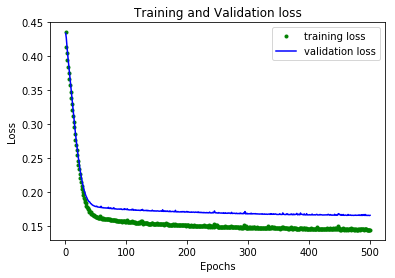

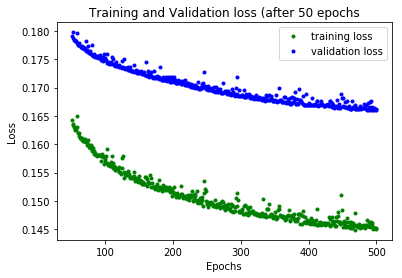

In [8]:
training_loss = training.history['loss']
validation_loss = training.history['val_loss']

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'g.', label='training loss')
plt.plot(epochs, validation_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
skip = 50

plt.plot(epochs[skip:], training_loss[skip:], 'g.', label='training loss')
plt.plot(epochs[skip:], validation_loss[skip:], 'b.', label='validation loss')
plt.title('Training and Validation loss (after 50 epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**2. Mean Absolute Error**

The [**mean absolute error**](https://en.wikipedia.org/wiki/Mean_absolute_error) is another way of measuring how far the network's predictions are from the actual numbers. See this link for a comparison with mean squared error: [link](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)

This graph tells another story. We can see that training data shows consistently lower error than validation data, which means that the network may have _overfit_, or learned the training data so rigidly that it can't make effective predictions about new data.

In addition, the mean absolute error values are quite high, ~0.305 at best, which means some of the model's predictions are at least 30% off, which means we are very far from accurately modelling the sine wave function.

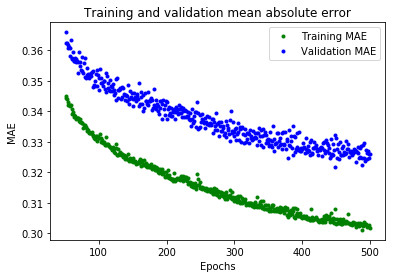

In [9]:
plt.clf()
training_mae = training.history['mae']
validation_mae = training.history['val_mae']

plt.plot(epochs[skip:], training_mae[skip:], 'g.', label='Training MAE')
plt.plot(epochs[skip:], validation_mae[skip:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


**3. Actual vs Predicted Outputs**

To get more insight into what is happening, let's check its predictions against the test dataset we set aside earlier. The graph makes it clear that our network has learned to approximate the sine function in a very limited way.

The rigidity of this fit suggests that the model does not have enough capacity to learn the full complexity of the sine wave function, so it's only able to approximate it in an overly simplistic way. 

By making our model bigger, we should be able to improve its performance.

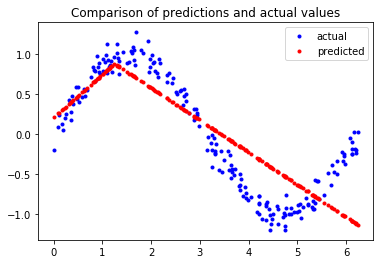

In [10]:
predictions = first_model.predict(x_validate)

plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_validate, y_validate, 'b.', label='actual')
plt.plot(x_validate, predictions, 'r.', label='predicted')
plt.legend()
plt.show()

## Building a larger Model

### 1. Design the Model
To make our model bigger, let's add an additional layer of neurons.

In [11]:
second_model = tf.keras.Sequential()
second_model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))
second_model.add(keras.layers.Dense(16, activation='relu'))
second_model.add(keras.layers.Dense(1))
second_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


### 2. Train the Model ###

In [12]:
training = second_model.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/500
600/600 [==============================] - 0s 748us/sample - loss: 0.4245 - mae: 0.5529 - val_loss: 0.4310 - val_mae: 0.5678
Epoch 2/500
600/600 [==============================] - 0s 38us/sample - loss: 0.4056 - mae: 0.5462 - val_loss: 0.4138 - val_mae: 0.5548
Epoch 3/500
600/600 [==============================] - 0s 41us/sample - loss: 0.3897 - mae: 0.5302 - val_loss: 0.3974 - val_mae: 0.5437
Epoch 4/500
600/600 [==============================] - 0s 42us/sample - loss: 0.3743 - mae: 0.5181 - val_loss: 0.3815 - val_mae: 0.5336
Epoch 5/500
600/600 [==============================] - 0s 45us/sample - loss: 0.3602 - mae: 0.5128 - val_loss: 0.3677 - val_mae: 0.5276
Epoch 6/500
600/600 [==============================] - 0s 44us/sample - loss: 0.3436 - mae: 0.5010 - val_loss: 0.3504 - val_mae: 0.5140
Epoch 7/500
600/600 [==============================] - 0s 45us/sample - loss: 0.3281 - mae: 0.4859 - val_loss: 0.3340 - val_mae: 0.5021
E

### 3. Plot Metrics

From these graphs, we can see several exciting things:

*   The overall loss and MAE are much better than our previous network
*   Metrics are better for validation than training, which means the network is not overfitting

The reason the metrics for validation are better than those for training is that validation metrics are calculated at the end of each epoch, while training metrics are calculated throughout the epoch, so validation happens on a model that has been trained slightly longer.

The evaluation metrics we printed show that the model has a low loss and MAE on the test data, and the predictions line up visually with our data fairly well.

The model isn't perfect; its predictions don't form a smooth sine curve. If we wanted to go further, we could try further increasing the capacity of the model, perhaps using some techniques to defend from overfitting.

However, an important part of machine learning is knowing when to quit, and this model is good enough for our use case - which is to make some LEDs blink in a pleasing pattern.


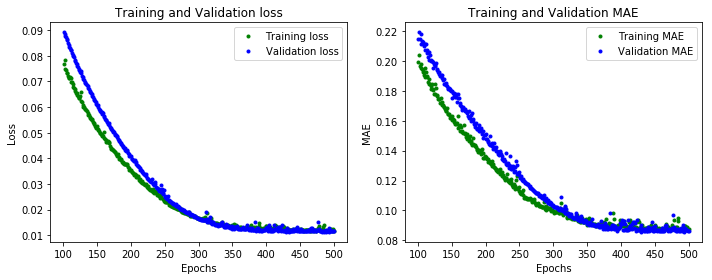

In [13]:
training_loss = training.history['loss']
validation_loss = training.history['val_loss']

training_mae = training.history['mae']
validation_mae = training.history['val_mae']

epochs = range(1, len(training_loss) + 1)

skip = 100

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs[skip:], training_loss[skip:], 'g.', label='Training loss')
plt.plot(epochs[skip:], validation_loss[skip:], 'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs[skip:], training_mae[skip:], 'g.', label='Training MAE')
plt.plot(epochs[skip:], validation_mae[skip:], 'b.', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()

200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

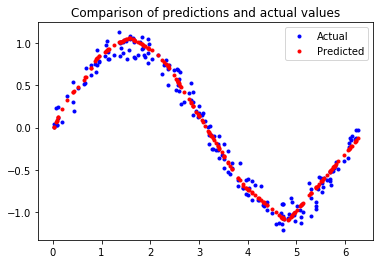

In [14]:
loss = second_model.evaluate(x_test, y_test)

predictions = second_model.predict(x_test)

plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

## Generate a TensorFlow Lite Model

### 1. Generate tiny models

We'll use the [TensorFlow Lite Converter](https://www.tensorflow.org/lite/convert) to convert the model into a special, space-efficient format for use on memory-constrained devices.

Since this model is going to be deployed on a microcontroller, we want it to be as tiny as possible! One technique for reducing the size of models is called [quantization](https://www.tensorflow.org/lite/performance/post_training_quantization) while converting the model. It reduces the precision of the model's weights, and possibly the activations (output of each layer) as well, which saves memory, often without much impact on accuracy. Quantized models also run faster, since the calculations required are simpler.

At around 2.5 kilobytes, this model is already so small that the weights make up only a small fraction of the overall size, meaning quantization has little effect. More complex models have many more weights, meaning the space saving from quantization will be much higher, approaching 4x for most sophisticated models.

Regardless, our quantized model will take less time to execute than the original version, which is important on a tiny microcontroller!

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(second_model)
tflite_model = converter.convert()
open('sine_model.tflite', 'wb').write(tflite_model)

optimizer = tf.lite.TFLiteConverter.from_keras_model(second_model)
optimizer.optmization = [tf.lite.Optimize.DEFAULT]
def representative_dataset_generator():
  for i in range(500):
    yield([x_train[i].reshape(1, 1)])
optimizer.representative_dataset = representative_dataset_generator
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
tflite_optimized_model = optimizer.convert()
open('sine_optmized_model.tflite', 'wb').write(tflite_optimized_model)

2736

### 2. Compare Model Sizes

In [16]:
import os
tflite_model_size = os.path.getsize('sine_model.tflite')
print("Model is %d bytes" % tflite_model_size)
tflite_optimized_model_size = os.path.getsize('sine_optmized_model.tflite')
print("Quantized model is %d bytes" % tflite_optimized_model_size)
difference = tflite_model_size - tflite_optimized_model_size
print("Difference is %d bytes" % difference)

Model is 2736 bytes
Quantized model is 2736 bytes
Difference is 0 bytes


### 3. Test the Models

To prove these models are still accurate after conversion and quantization, we'll use both of them to make predictions and compare these against our test results.

We can see from the graph that the predictions for the original model, the converted model, and the quantized model are all close enough to be indistinguishable.

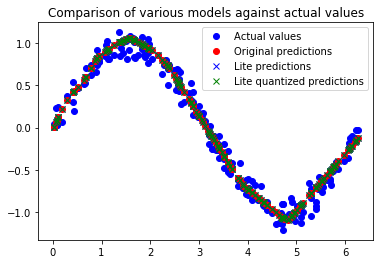

In [17]:
tflite_model = tf.lite.Interpreter('sine_model.tflite')
tflite_optimized_model = tf.lite.Interpreter('sine_optmized_model.tflite')

tflite_model.allocate_tensors()
tflite_optimized_model.allocate_tensors()

tflite_model_input = tflite_model.tensor(tflite_model.get_input_details()[0]["index"])
tflite_model_output = tflite_model.tensor(tflite_model.get_output_details()[0]["index"])
tflite_optimized_model_input = tflite_optimized_model.tensor(tflite_optimized_model.get_input_details()[0]["index"])
tflite_optimized_model_output = tflite_optimized_model.tensor(tflite_optimized_model.get_output_details()[0]["index"])

tflite_model_predictions = np.empty(x_test.size)
tflite_optimized_model_predictions = np.empty(x_test.size)

for i in range(x_test.size):
  tflite_model_input().fill(x_test[i])
  tflite_model.invoke()
  tflite_model_predictions[i] = tflite_model_output()[0]

  tflite_optimized_model_input().fill(x_test[i])
  tflite_optimized_model.invoke()
  tflite_optimized_model_predictions[i] = tflite_optimized_model_output()[0]

plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual values')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, tflite_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, tflite_optimized_model_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()

## Generate a TensorFlow Lite for Microcontrollers Model
Convert the TensorFlow Lite quantized model into a C source file that can be loaded by TensorFlow Lite for Microcontrollers unsing the xxd tool

In [18]:
!apt-get update && apt-get -qq install xxd
!xxd -i sine_optmized_model.tflite > sine_optmized_model.cc
!cat sine_optmized_model.cc

/bin/sh: apt-get: command not found
unsigned char sine_optmized_model_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00,
  0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00,
  0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x64, 0x0a, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x2c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0xbc, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0xe4, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x54, 0x4f, 0x43, 0x4f, 0x20, 0x43, 0x6f, 0x6e,
  0x76, 0x65, 0x72, 0x74, 0x65, 0x64, 0x2e, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x88, 0x00, 0x00, 0x00, 0x7c, 0x00, 0x00, 0x00, 0x68, 0x00, 0x00, 0x00,
  0x54, 0x00, 0x00, 0x00, 0x48, 0x00, 0x00, 0x00, 0x40, 0x00, 0x00, 0x00,
  0x34, 0x00, 0x00, 0x00, 0x2c, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0x18, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xb6, 0xff, 0xff, 0xff, 0x5

## Deploy to a Microcontroller

Follow the instructions in the [hello_world](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/lite/micro/examples/hello_world) README.md for [TensorFlow Lite for MicroControllers](https://www.tensorflow.org/lite/microcontrollers/overview) to deploy this model on a specific microcontroller.